In [1]:
!pwd

/Users/zhuodicai/Desktop/uw_projects/eeg_meditation


In [2]:
!conda env list

# conda environments:
#
                         /Users/zhuodicai/miniconda3
                         /Users/zhuodicai/miniconda3/envs/node
base                     /opt/anaconda3
publicplayground      *  /opt/anaconda3/envs/publicplayground



In [5]:
# !pip install mne

In [61]:
import mne

input_fname = "./data/ds001787-1.1.1/sub-001/ses-01/eeg/sub-001_ses-01_task-meditation_eeg.bdf"

raw = mne.io.read_raw_bdf(input_fname, preload=True)

print("______\n", raw.info)
raw.info

Extracting EDF parameters from /Users/zhuodicai/Desktop/uw_projects/eeg_meditation/data/ds001787-1.1.1/sub-001/ses-01/eeg/sub-001_ses-01_task-meditation_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 696575  =      0.000 ...  2720.996 secs...
______
 <Info | 8 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 79 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 52.0 Hz
 meas_date: 2014-04-04 19:40:17 UTC
 nchan: 80
 projs: []
 sfreq: 256.0 Hz
 subject_info: <subject_info | his_id: >
>


<Info | 8 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 79 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 52.0 Hz
 meas_date: 2014-04-04 19:40:17 UTC
 nchan: 80
 projs: []
 sfreq: 256.0 Hz
 subject_info: <subject_info | his_id: >
>

In [19]:
type(raw)

mne.io.edf.edf.RawEDF

In [62]:
print("Channel count:",len(raw.info.ch_names))
print("Channel names:",raw.info.ch_names)
print("Bad channels:", raw.info['bads'])

Channel count: 80
Channel names: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp', 'Status']
Bad channels: []


<b>we only need EEG channels so drop others</b>

In [63]:
raw.drop_channels(["EXG1", "EXG2", "EXG3", "EXG4", "EXG5", "EXG6", "EXG7", "EXG8", "GSR1", "GSR2", "Erg1", "Erg2", "Resp", "Plet", "Temp", "Status"])

<RawEDF | sub-001_ses-01_task-meditation_eeg.bdf, 64 x 696576 (2721.0 s), ~340.2 MiB, data loaded>

In [16]:
raw['A1']

(array([[-0.00404095, -0.00404088, -0.00404938, ...,  0.0011112 ,
          0.00111292,  0.00111589]]),
 array([0.00000000e+00, 3.90625000e-03, 7.81250000e-03, ...,
        2.72098828e+03, 2.72099219e+03, 2.72099609e+03]))

In [8]:
# !pip install --upgrade jupyter
# !pip install --upgrade ipython

In [40]:
data, times = raw.get_data(return_times=True)
print(data.shape)
print(times.shape)

(64, 696576)
(696576,)


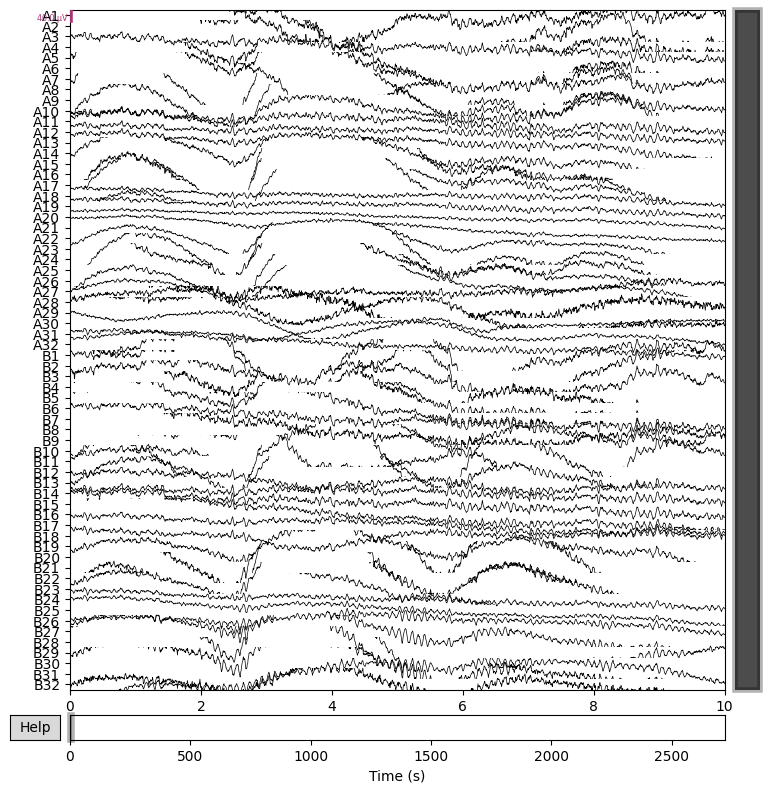

Figure(800x800)


In [38]:
print(raw.plot(n_channels=64))

<b>standard montage built-in types</b>

https://mne.tools/0.21/generated/mne.channels.make_standard_montage.html

<b>check montage's naming convention and edit our channels names</b>

In [90]:
import mne
# biosemi64, biosemi16
# GSN-HydroCel-64_1.0

montage = mne.channels.make_standard_montage('biosemi16')
# check its naming convention
print("biosemi16:",len(montage.ch_names), montage.ch_names)

print("\n⬇️32——————\n")

montage = mne.channels.make_standard_montage('biosemi32')
# check its naming convention
print("biosemi32:", len(montage.ch_names), montage.ch_names)

montage = mne.channels.make_standard_montage('GSN-HydroCel-32')
# check its naming convention
print("GSN-HydroCel-32:", len(montage.ch_names), montage.ch_names)

print("\n⬇️64——————\n")

montage = mne.channels.make_standard_montage('biosemi64')
# check its naming convention
print("biosemi64:",len(montage.ch_names), montage.ch_names)

montage = mne.channels.make_standard_montage('GSN-HydroCel-64_1.0')
# check its naming convention
print("GSN-HydroCel-64_1.0:", len(montage.ch_names), montage.ch_names)

biosemi16: 16 ['Fp1', 'Fp2', 'F4', 'Fz', 'F3', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P4', 'Pz', 'P3', 'O1', 'Oz', 'O2']

⬇️32——————

biosemi32: 32 ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz']
GSN-HydroCel-32: 33 ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E32', 'Cz']

⬇️64——————

biosemi64: 64 ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 

In [69]:
channel_mapping = {}
for i in range(32):
    old_channel_name_A = 'A' + str(i + 1)
    new_channel_name = 'E' + str(i + 1)
    channel_mapping[old_channel_name_A] = new_channel_name
    
for i in range(32):
    old_channel_name_A = 'B' + str(i + 1)
    new_channel_name = 'E' + str(i + 33)
    channel_mapping[old_channel_name_A] = new_channel_name
    
print(channel_mapping)

# Rename the channels using the mapping dictionary
raw.rename_channels(channel_mapping)

# Print the new channel names
print(raw.ch_names)

{'A1': 'E1', 'A2': 'E2', 'A3': 'E3', 'A4': 'E4', 'A5': 'E5', 'A6': 'E6', 'A7': 'E7', 'A8': 'E8', 'A9': 'E9', 'A10': 'E10', 'A11': 'E11', 'A12': 'E12', 'A13': 'E13', 'A14': 'E14', 'A15': 'E15', 'A16': 'E16', 'A17': 'E17', 'A18': 'E18', 'A19': 'E19', 'A20': 'E20', 'A21': 'E21', 'A22': 'E22', 'A23': 'E23', 'A24': 'E24', 'A25': 'E25', 'A26': 'E26', 'A27': 'E27', 'A28': 'E28', 'A29': 'E29', 'A30': 'E30', 'A31': 'E31', 'A32': 'E32', 'B1': 'E33', 'B2': 'E34', 'B3': 'E35', 'B4': 'E36', 'B5': 'E37', 'B6': 'E38', 'B7': 'E39', 'B8': 'E40', 'B9': 'E41', 'B10': 'E42', 'B11': 'E43', 'B12': 'E44', 'B13': 'E45', 'B14': 'E46', 'B15': 'E47', 'B16': 'E48', 'B17': 'E49', 'B18': 'E50', 'B19': 'E51', 'B20': 'E52', 'B21': 'E53', 'B22': 'E54', 'B23': 'E55', 'B24': 'E56', 'B25': 'E57', 'B26': 'E58', 'B27': 'E59', 'B28': 'E60', 'B29': 'E61', 'B30': 'E62', 'B31': 'E63', 'B32': 'E64'}


ValueError: Invalid channel name(s) {'B22', 'B13', 'A1', 'A23', 'A12', 'B7', 'A10', 'B9', 'A29', 'B21', 'B24', 'B14', 'B20', 'A18', 'B15', 'B8', 'A20', 'A11', 'B27', 'A28', 'A32', 'B26', 'A16', 'A9', 'A19', 'B10', 'A24', 'B25', 'B30', 'A8', 'B2', 'B28', 'B32', 'A13', 'A15', 'B11', 'B23', 'B16', 'B18', 'A21', 'A31', 'A3', 'B29', 'B31', 'A22', 'A4', 'A6', 'A27', 'A2', 'A30', 'B5', 'B4', 'A5', 'A25', 'A14', 'A17', 'B12', 'B6', 'B3', 'B19', 'B1', 'A7', 'A26', 'B17'} are not present in info

In [70]:
ten_twenty_montage = mne.channels.make_standard_montage('GSN-HydroCel-64_1.0')
raw.set_montage(ten_twenty_montage)

<RawEDF | sub-001_ses-01_task-meditation_eeg.bdf, 64 x 696576 (2721.0 s), ~340.2 MiB, data loaded>

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


/opt/anaconda3/envs/publicplayground/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


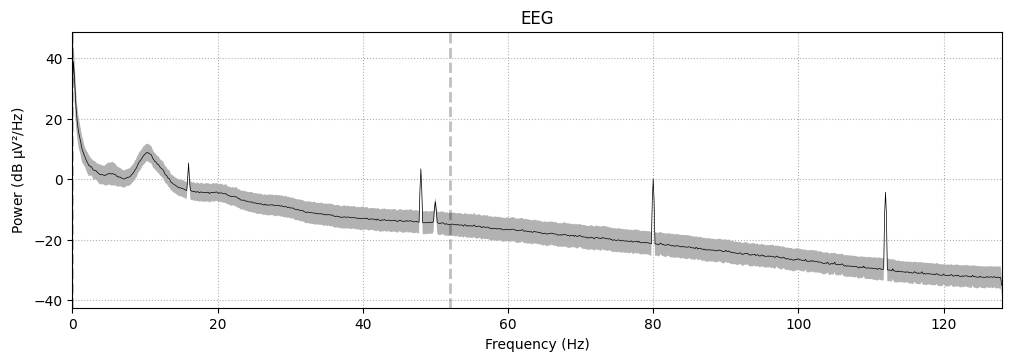

In [71]:
spectrum = raw.compute_psd()
spectrum.plot(average=True, picks="data", exclude="bads")

In [72]:
spectrum

<Power Spectrum (from Raw, welch method) | 64 channels × 1025 freqs, 0.0-128.0 Hz>

In [81]:
print(dir(raw.filter))
print("______")
print(dir(raw))

['__call__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__func__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
______
['__class__', '__contains__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_annotations', '_cals', '_check_bad_segment', '_comp', '_cropped_samp', '_data', '_dtype', '_dtype_', '_extra_attributes', '_filenames', '_first_samps', '_first_time

In [73]:
# Set the filter parameters
order = 6
freq_cutoff = 2.0
transition_bandwidth = 0.7

# Design the high-pass IIR filter
raw.filter(l_freq=freq_cutoff, h_freq=None, method='iir', iir_params=dict(order=order, ftype='butter', output='sos', bw=transition_bandwidth))

raw.set_eeg_reference('average', projection=True)
raw.apply_proj()

# Apply the filter to the data
filtered_data = raw.get_data()

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 2 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoff at 2.00 Hz: -6.02 dB

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


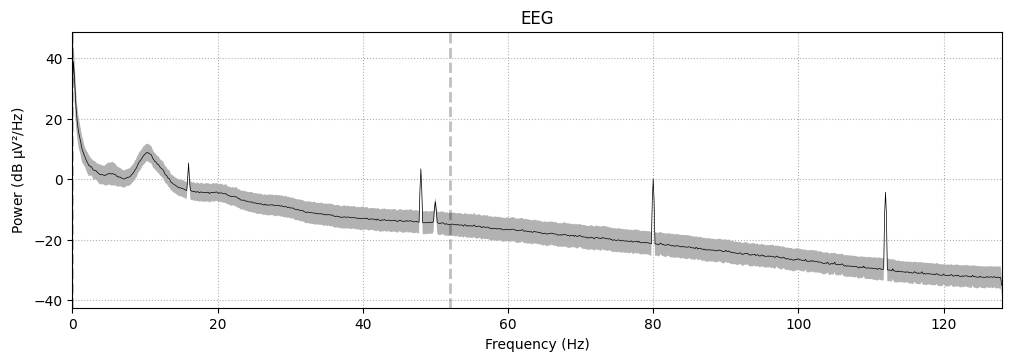

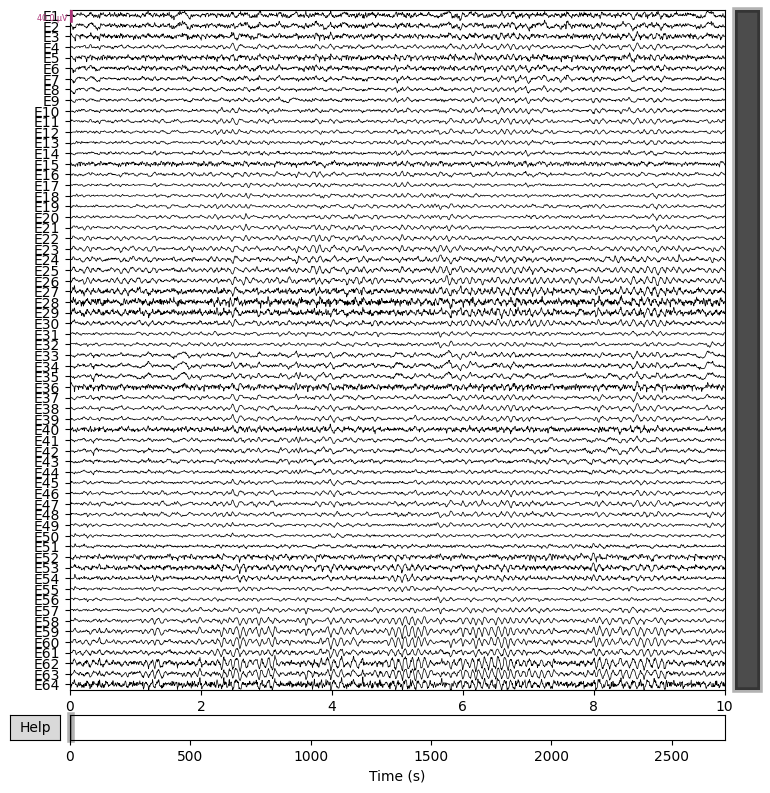

Figure(800x800)


In [74]:
print(raw.plot(n_channels=64))

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


/opt/anaconda3/envs/publicplayground/lib/python3.12/site-packages/mne/viz/_mpl_figure.py:2355: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(FigureClass=FigureClass, **kwargs)


Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


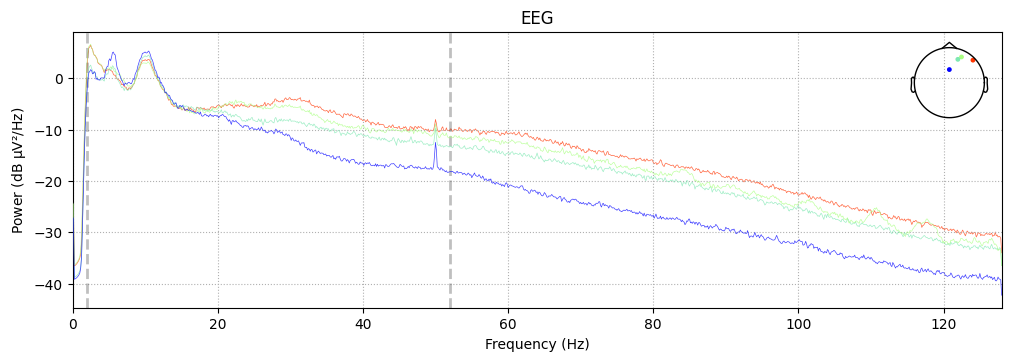

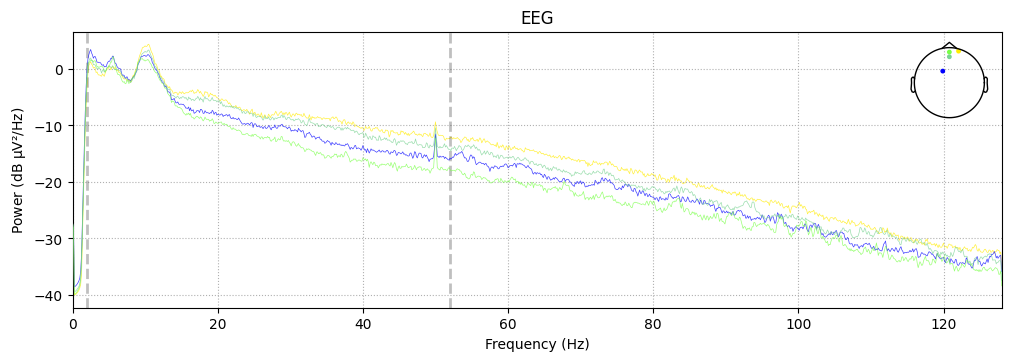

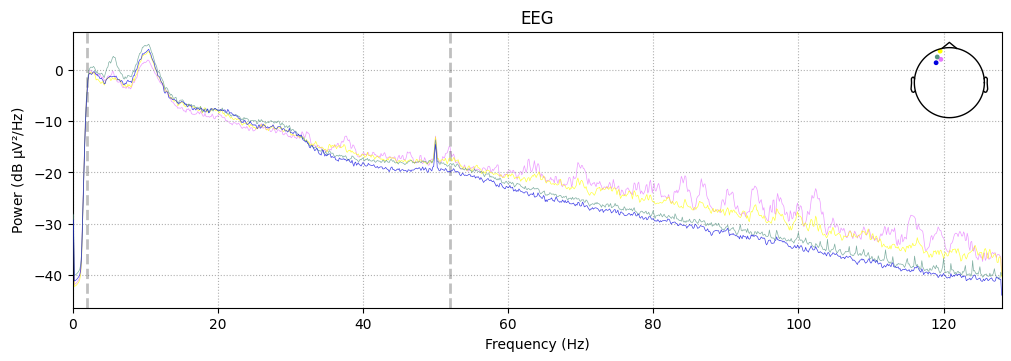

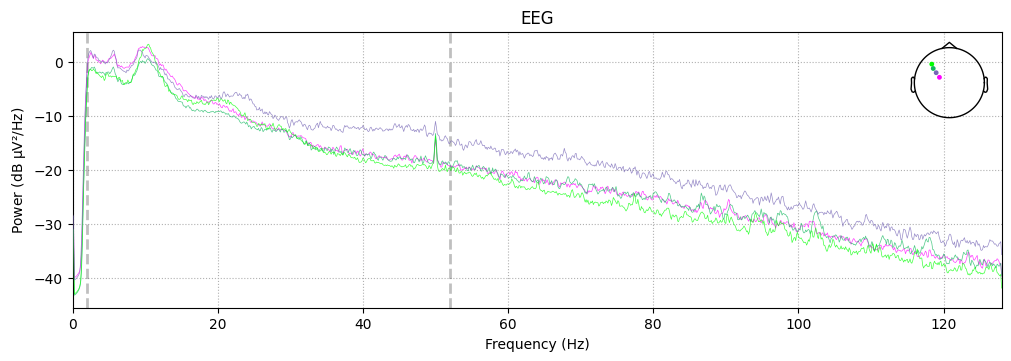

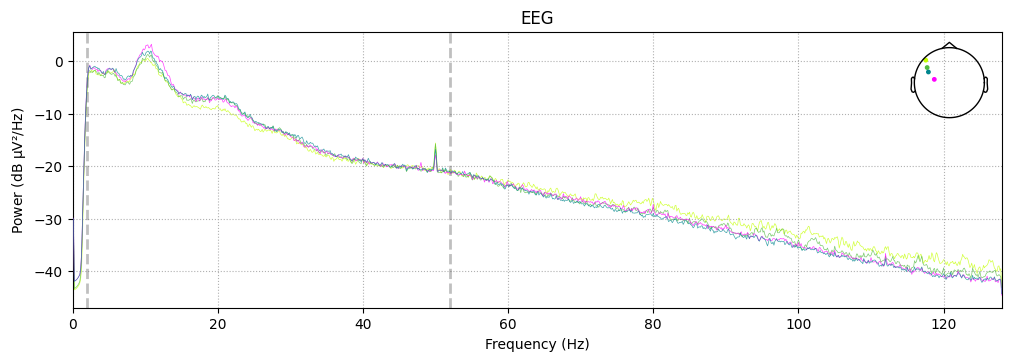

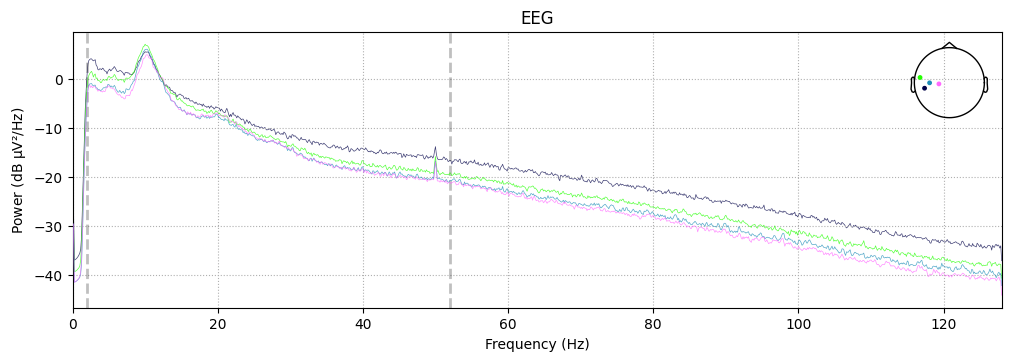

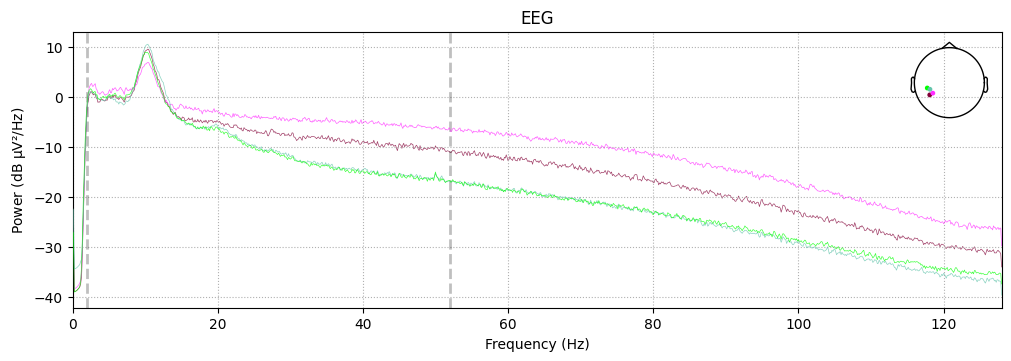

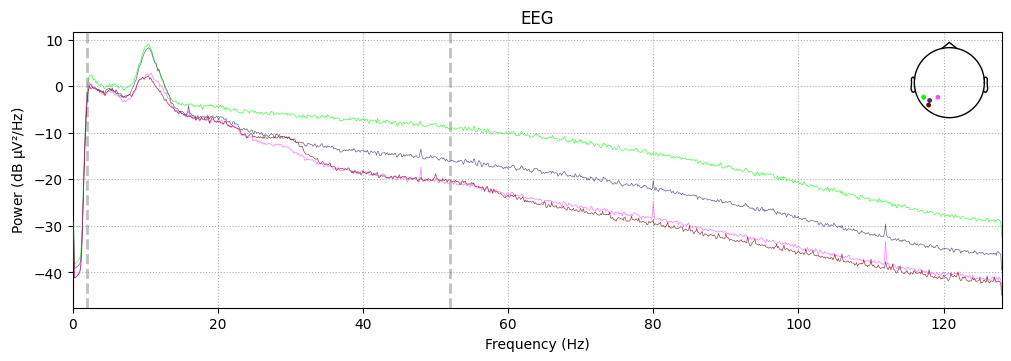

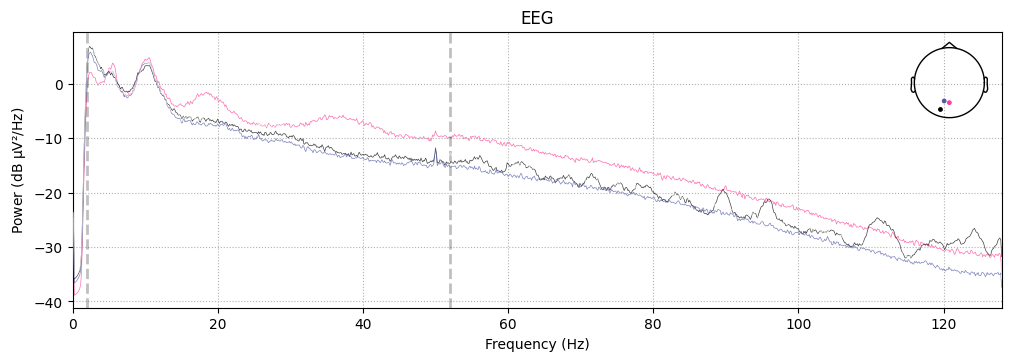

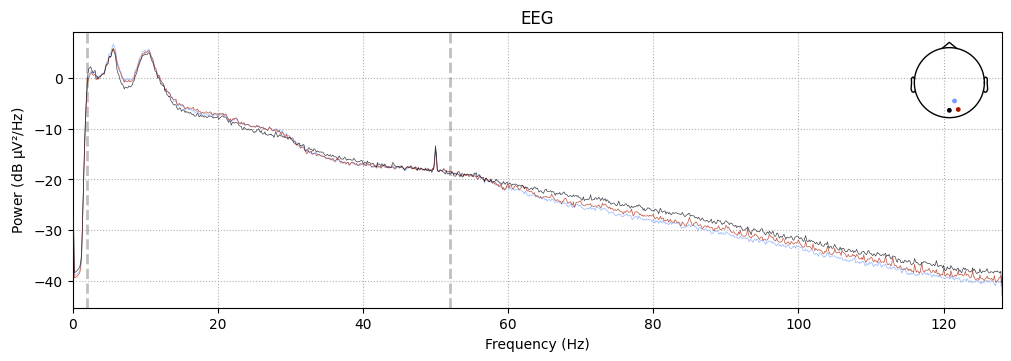

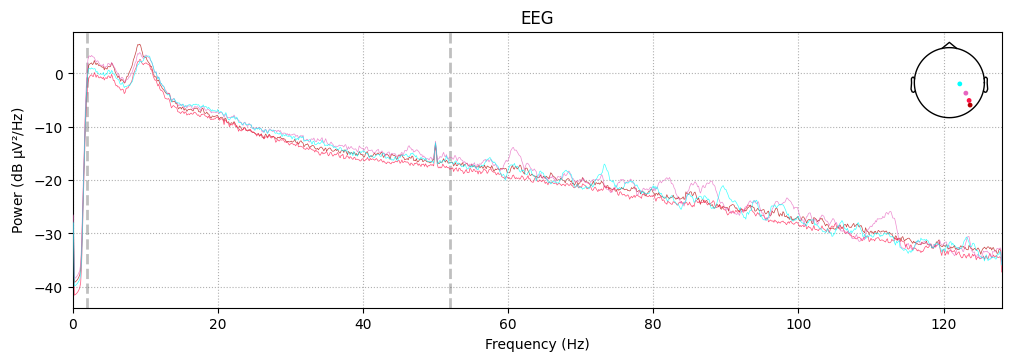

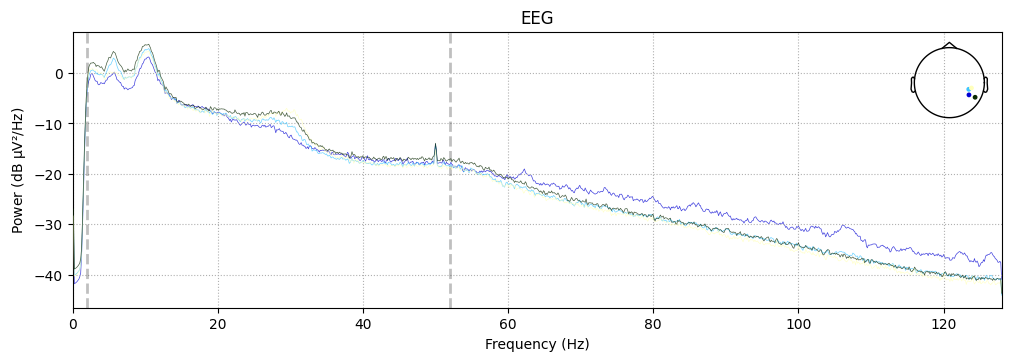

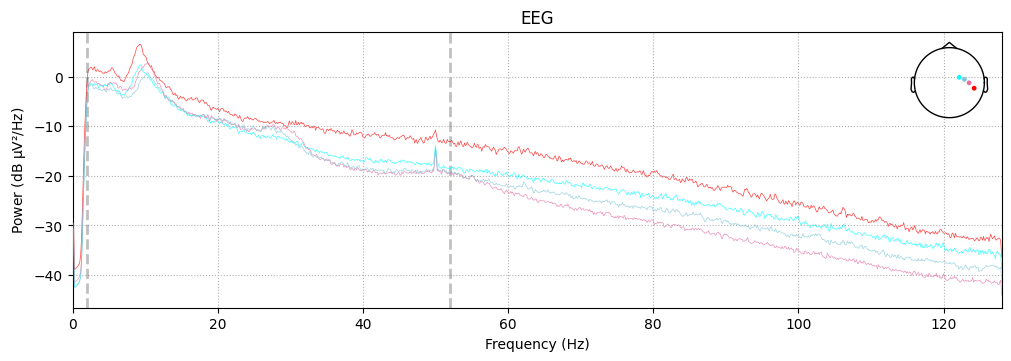

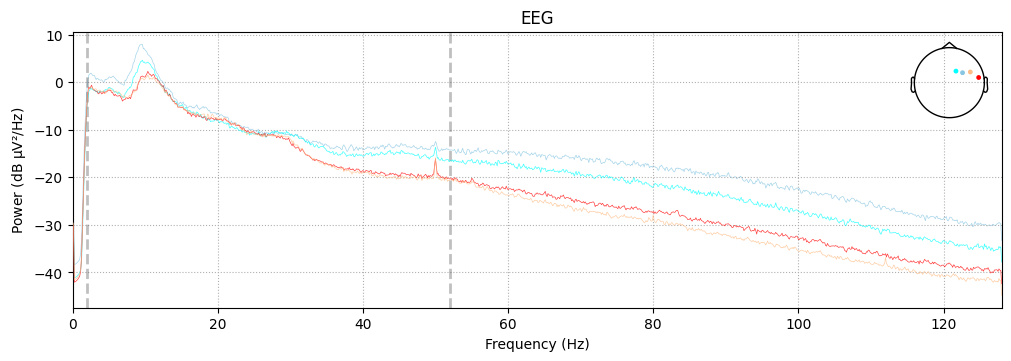

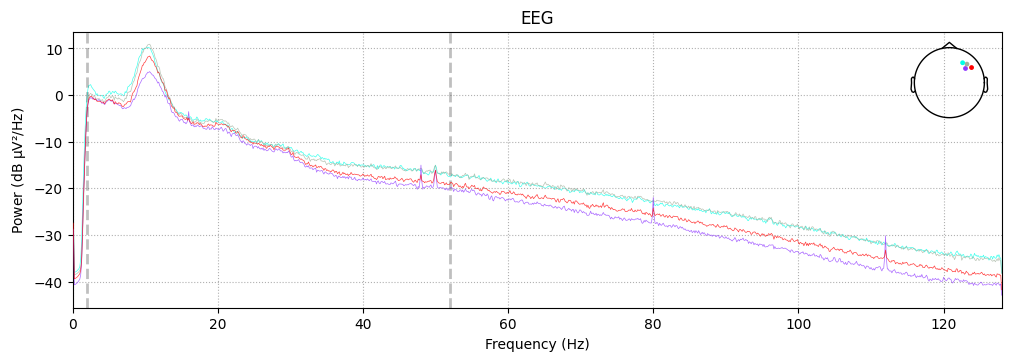

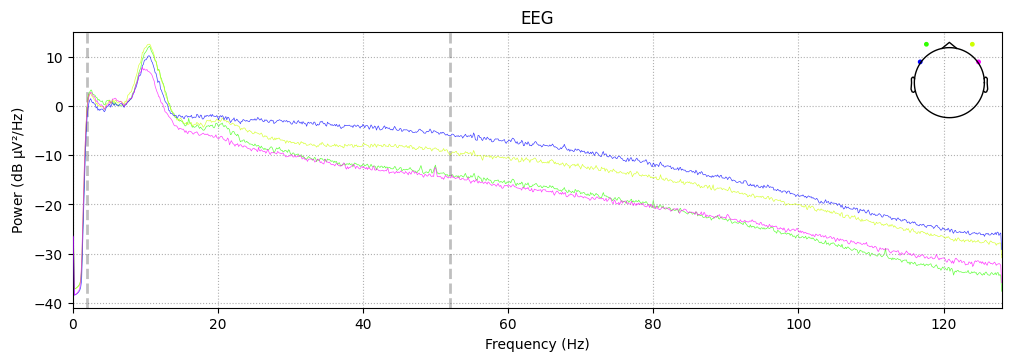

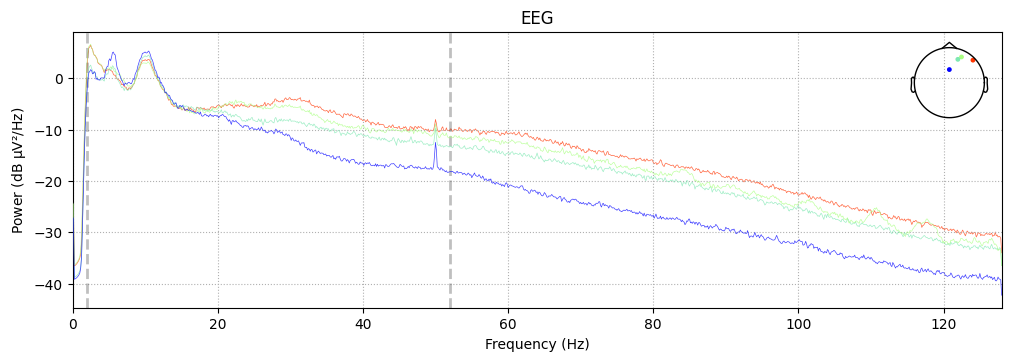

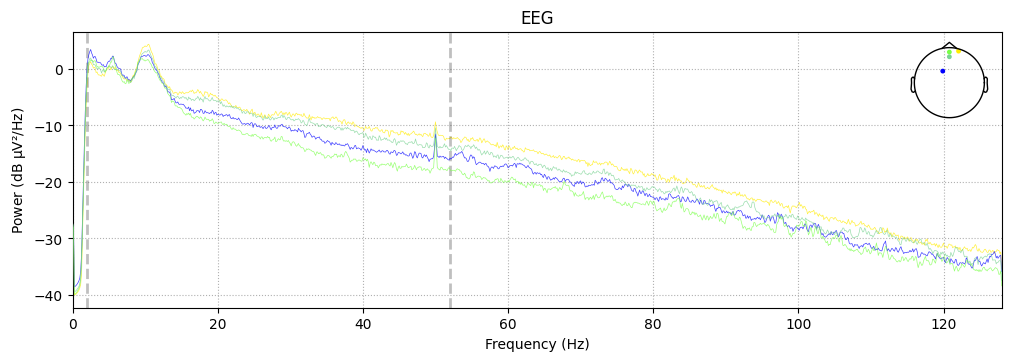

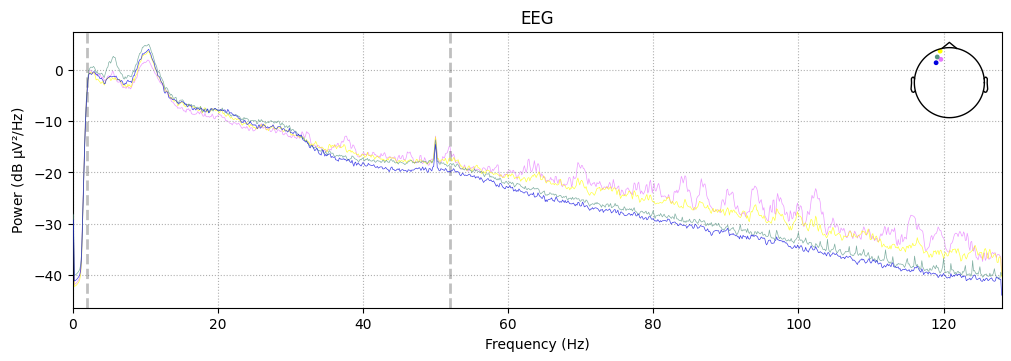

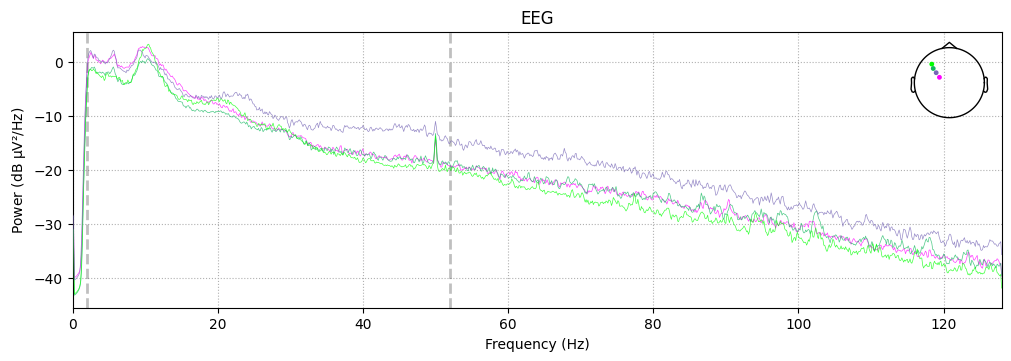

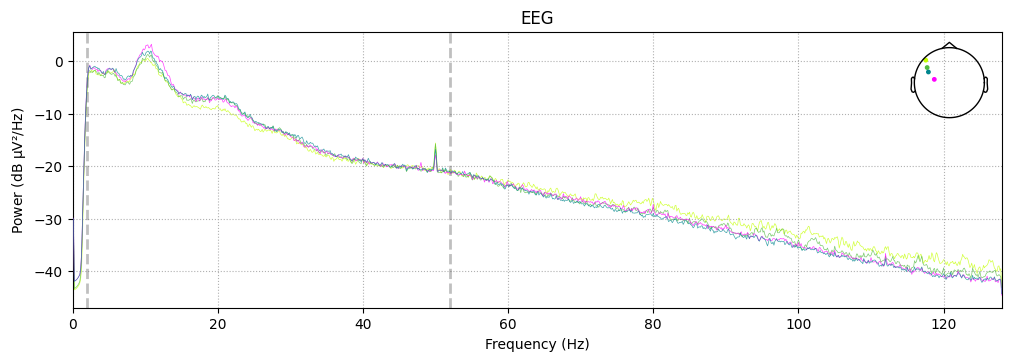

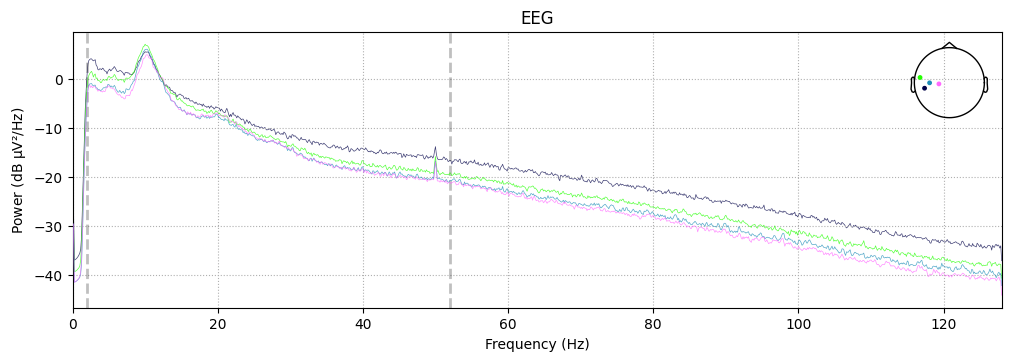

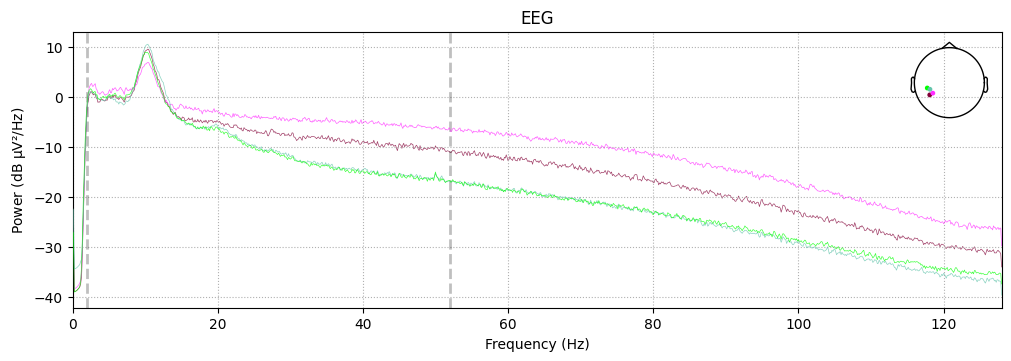

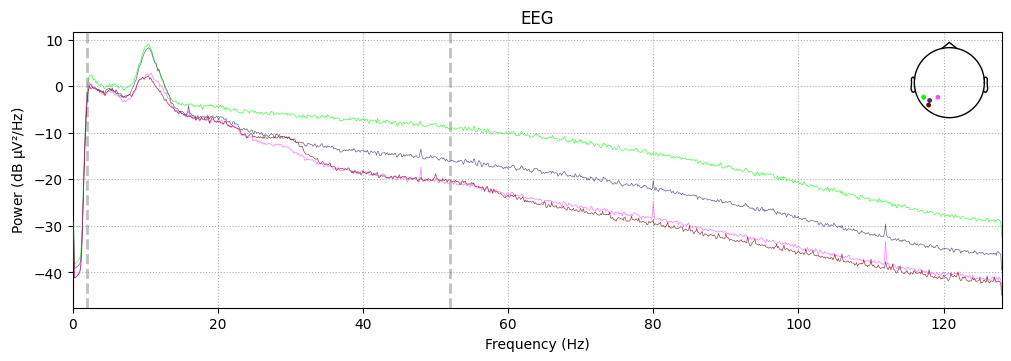

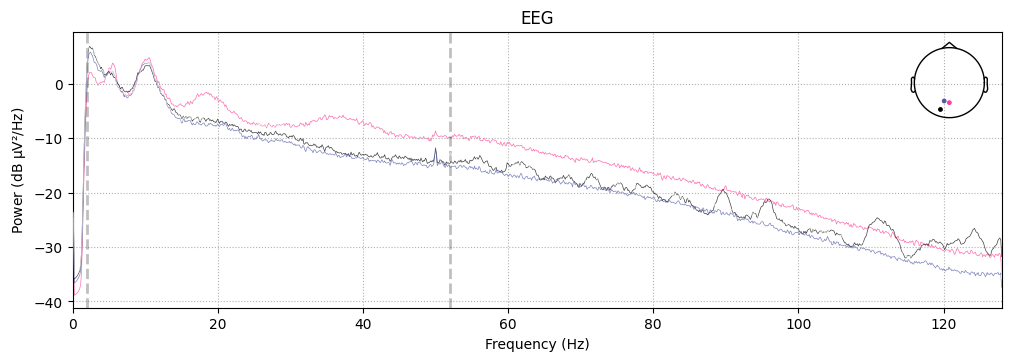

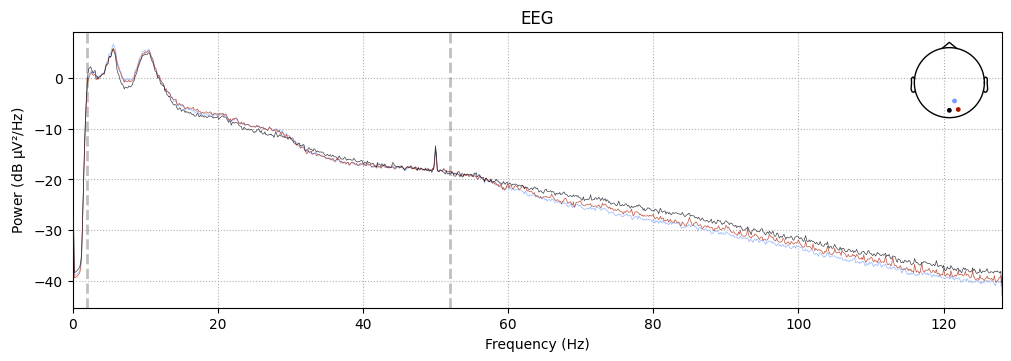

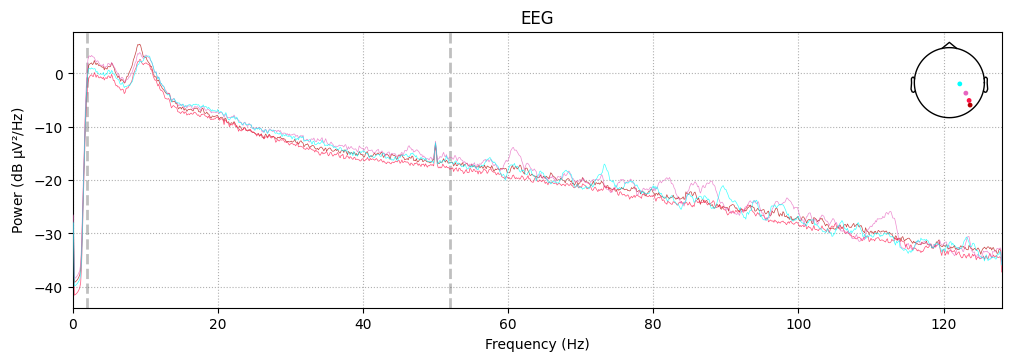

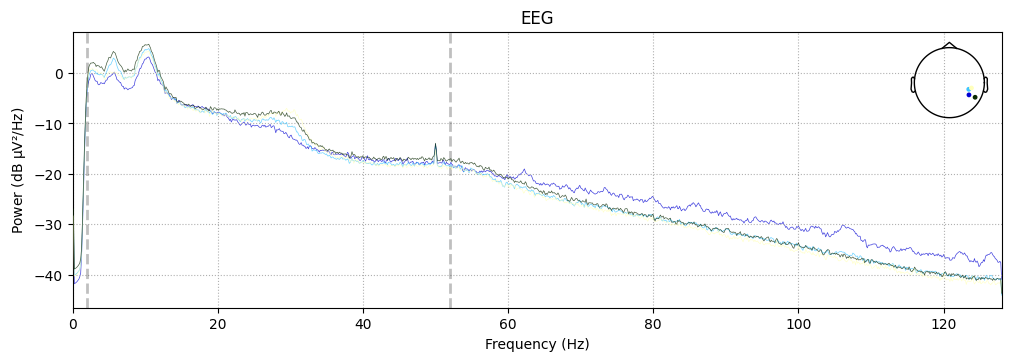

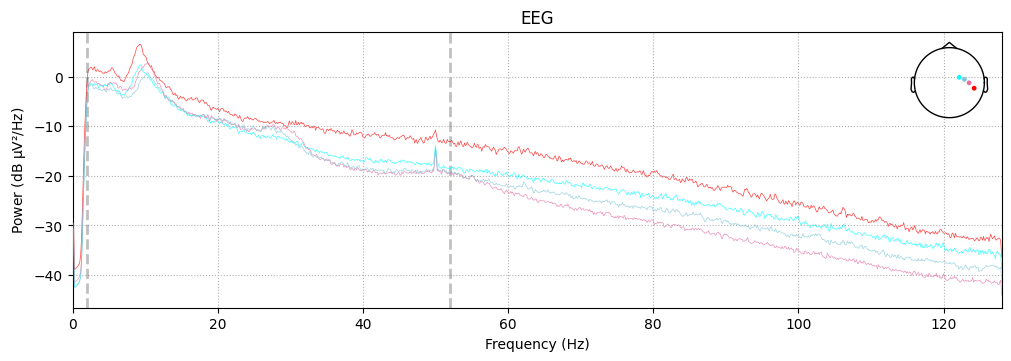

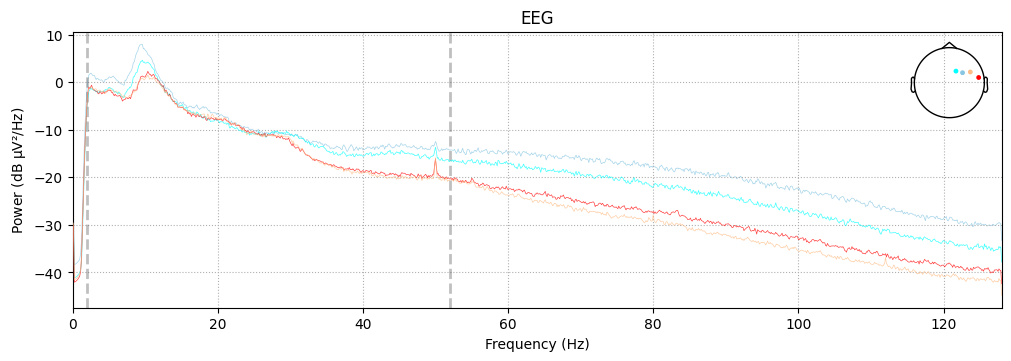

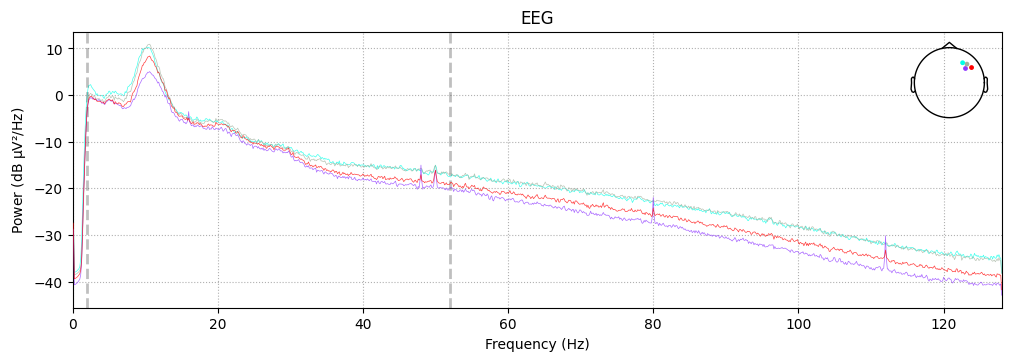

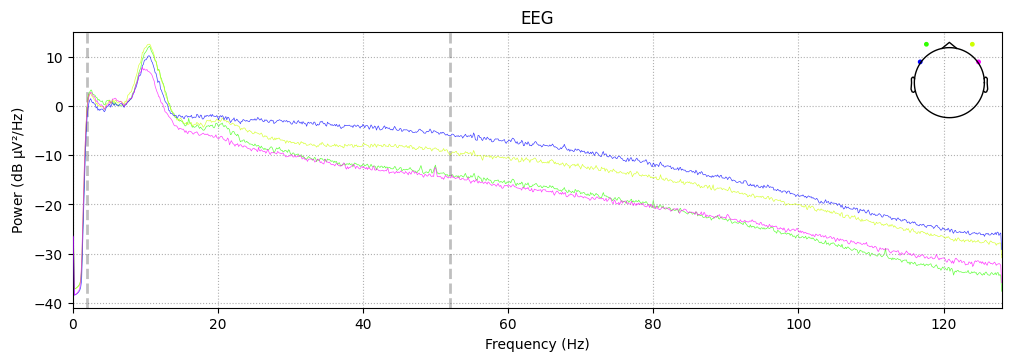

In [33]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# Get the list of channel names
channel_names = raw.ch_names

# Iterate over each channel
for i in range(0,len(channel_names),4):

    # Select the channel and compute the power spectrum
    channel_data = raw.copy().pick([i,i+1,i+2,i+3])
    spectrum = channel_data.compute_psd()
    # Plot the power spectrum
    spectrum.plot(average=False, picks="data", exclude="bads", show=False)

# Show the plot
plt.show()
